C:\Users\laure\WebSocketClientCSharp\WebSocketClient\WebSocketClient\bin\Debug\xp
C:\Users\laure\WebSocketClientCSharp\WebSocketClient\WebSocketClient\bin\Debug\xp
Sel_0_0.csv
Sel_0_120.csv
Sel_0_180.csv
Sel_0_23.csv
Sel_0_45.csv
Sel_0_90.csv
{'0': -53.145, '120': -53.035, '180': -53.035, '23': -53.08, '45': -53.1, '90': -53.035}
0;-53.145;-53.08;-53.1;-53.035;-53.035;-53.035
Sel_5_0.csv
Sel_5_120.csv
Sel_5_180.csv
Sel_5_23.csv
Sel_5_45.csv
Sel_5_90.csv
{'0': -53.145, '120': -53.145, '180': -53.145, '23': -53.145, '45': -53.05, '90': -53.145}
5;-53.145;-53.145;-53.05;-53.145;-53.145;-53.145
{}
Sel_15_0.csv
Sel_15_120.csv
Sel_15_180.csv
Sel_15_23.csv
Sel_15_45.csv
Sel_15_90.csv
{'0': -53.145, '120': -53.145, '180': -53.145, '23': -53.145, '45': -53.145, '90': -53.145}
15;-53.145;-53.145;-53.145;-53.145;-53.145;-53.145
Sel_25_0.csv
Sel_25_120.csv
Sel_25_180.csv
Sel_25_23.csv
Sel_25_45.csv
Sel_25_90.csv
{'0': -53.145, '120': -53.145, '180': -53.145, '23': -53.145, '45': -53.145, '90': -53

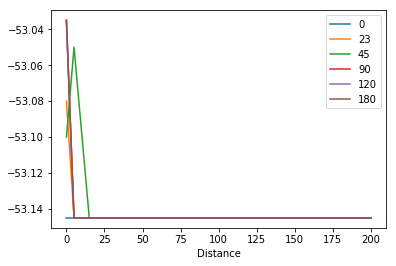

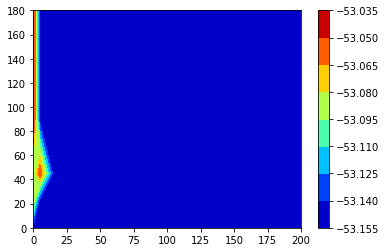

C:\Users\laure\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\laure\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in true_divide
C:\Users\laure\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:141: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


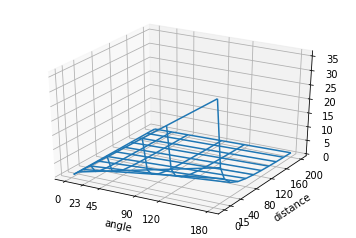

In [25]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import datetime
import pandas_datareader as pdr
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import glob, os

#fonction qui renvoie le bon path
def getPath() :
    
    #Path courant
    cwd = os.getcwd()
    #C:\Users\laure\WebSocketClientCSharp\WebSocketClient\generate
    print(cwd)

    #On va changer de path (cwd, '../WebSocketClient/bin/Debug/xp/'))
    os.chdir('../xp/')
    print(os.getcwd())

    return;

def finalDataExist() :
    #On va remplir le fichier final : tester s'il existe
    #Si le fichier n'existe pas on le crée
    
    if os.path.isfile('data/finalData.csv') is True:
        os.remove('data/finalData.csv')
        
    open('data/finalData.csv', 'a').close()        
        
    #On écrit le nom des colonnes
    with open('data/finalData.csv', 'a') as the_file:
        the_file.write('Distance;0;23;45;90;120;180')
        the_file.write('\n')
    #else:
        
    return;

#----------- TO DO -------------
#Fonction permettant de delete tous les précédentes data
def clearAll() :
    
    folders = ['data/2d','data/3d','data/2ddistanceangle','data/heatmap']
    
    for folder in folders:
    
        for the_file in os.listdir(folder):
            file_path = os.path.join(folder, the_file)
        
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
        
                #elif os.path.isdir(file_path): shutil.rmtree(file_path)
            except Exception as e:
                print(e)
    
    return;
    
def generationHeatMap() :
    
    #Separé par des ; donc l'index est la première colonne
    df = pd.read_csv('data/finalData.csv',sep=';',index_col=0)

    #notre X sera l'index : la distance
    x = df.index

    #notre Y sera l'index : la distance
    y = df.columns.astype(int)

    df.values.astype(float)
    z = df.values

    X,Y = np.meshgrid(x,y)
    Z = z.T
    plt.contourf(X,Y,Z,cmap='jet')

    plt.colorbar()
    plt.savefig('data/heatmap/{}.png'.format('heatmap'))

    plt.show()
    plt.close()

    return;

def generation2DDistanceAngle() :
    
    #Separé par des ; donc l'index est la première colonne
    df = pd.read_csv('data/finalData.csv',sep=';',index_col=0)

    #print(df)

    df=df.astype(float)
    
    fig = df.plot().get_figure()
    fig.savefig("data/2ddistanceangle/output.png")
    plt.show(block=False)
    plt.close(fig)
    
    return;

def generationWireFrame() :
    
    raw_data = np.loadtxt('data/finalData.csv', delimiter=';', dtype=np.string_)

    angle    = raw_data[0 , 1:].astype(float)
    distance = raw_data[1:, 0 ].astype(float)
    data     = raw_data[1:, 1:].astype(float)


    #Données à l'intérieur de la matrice
    data = angle[np.newaxis,:] / distance[:,np.newaxis] 

    #Setup du plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #Créer les données que le wireframe souhaite
    Z = data
    X, Y = np.meshgrid(angle, distance)

    ax.plot_wireframe(X, Y, Z)

    #Legendes
    ax.set_xticks(angle)
    ax.set_yticks(distance[::2])
    ax.set_xlabel('angle')
    ax.set_ylabel('distance')

    #On la'ffiche et on l'enregistre
    plt.savefig('data/3d/3d.png')
    plt.show()


    return;

#------------------------------------------------------------------
#on va générer les csv des moyennes pour chaque Angle
#On va parcourir tous les CSV ayant la même distance pour un angle
#Faire la moyenne des données dans le fichier CSV
#...
#------------------------------------------------------------------

#On change le directory
getPath()

#On va nettoyer les potentiels anciens fichiers
clearAll()

#Liste des angles permettant d'effectuer les lectures pour les algo
distances = ['0','5','10','15','25','40','60','80','100','120','140','160','180','200']

finalDataExist()

for (i, distance) in enumerate(distances):
    #i = index
    #distance = distance courante
    
    #Nous allons stocker les moyennes des RSSI pour chaque couple distance/angle
    averagesRSSI = {}
    
    for file in glob.glob("*.csv"):
        #nom du fichier
        #print(file)
        
        #On sépare le nom du fichier pour savoir si l'angle est le bon
        parts = file.split('_')
        
        #On récupère la distance courante
        #Avec cette distance on va lire tous les fichiers qui concernent cette distance
        #créer une ligne pour append dans le csv final
        
        #Alors on va lire le fichier
        
        if parts[1] == distance:  
            print(file)
            filePath = os.getcwd().replace("\\","/")+"/"+file

            # --------------- CONSTRUCTION GRAPHE 2D RSSI / TIME -------------------------
            
            df = pd.read_csv(filePath,sep=';',index_col=0,parse_dates=True)

            #Moyenne -------------
            #On dit que c'est un float
            df['rssi1'] =df.astype(float)

            #On fait la moyenne de la première colonne
            average = df['rssi1'].mean()
            nb = df.shape[0]
            
            #On enregistre l'average RSSI dans le tableau pour l'append dans le finalData.csv
            #EXEMPLE : Sel_0_0.csv alors averageRSSI[0'°'] = moyenne courante
            #Sel_0_23.csv : averageRSSI[23] = moyenne courante
            #...
            averagesRSSI[file.split('_')[2].split('.')[0]] = average
            
            #On va plot (dessiner) le graph de l'évolution du RSSI selon le temps
            plt.ylabel('RSSI')
            plt.grid(True)
            df['rssi1'].plot()
            
            #On affiche la moyenne dans le plot
            plt.axhline(y=average, color='r', linestyle='-')
            
            temp = file.split('.')[0]
            plt.savefig('data/2d/'+temp+'.png')
            plt.close()
            #Si le fichier n'existe pas on le crée
            if os.path.isfile('data/data.csv') is False:
                open('data/data.csv', 'a').close()
                
                #On écrit le nom des colonnes
                with open('data/data.csv', 'a') as the_file:
                    the_file.write('Nom;Echantillons;Moyenne;EcartType;MoyenneTemps')
                    the_file.write('\n')        
                
            #On écrit les infos
            #Le nom du fichier + nombre d'échantillons + la moyenne + écart type + [autres infos]
            with open('data/data.csv', 'a') as the_file:
                the_file.write(temp+';'+str(nb)+';'+str(average)+';'+'0'+';'+'0')
                the_file.write('\n')
                
            #----------------------------------------------------------------------
            
                
        del parts
    
    print(averagesRSSI)
    #Maintenant que notre dictionnary des moyennes pour chaque couple Distance / Angle
    
    if bool(averagesRSSI) is True:
        final = distance + ';' + str(averagesRSSI["0"]) + ';'+ str(averagesRSSI["23"]) + ';' + str(averagesRSSI["45"]) + ';' + str(averagesRSSI["90"]) + ';' + str(averagesRSSI["120"]) + ';' + str(averagesRSSI["180"])
        print(final)
        
        with open('data/finalData.csv', 'a') as the_file:
                the_file.write(final)
                the_file.write('\n')
    
    
    
    del averagesRSSI


generation2DDistanceAngle()
    
generationHeatMap()

generationWireFrame()